# Part II -  GoBike System Dataset Exploration 
## SAUD ALSHUSHAN




## Investigate how does user type differ in usage of the system 


> **Presentation goal** is to explore the differencess of  subscriber and customer usertype in activity of using the GoBike System

> We explored that customers do not share bike trips and subscribers tend to not use the feature sharing trips as main use.
>We also explord that majority of users are in begining of 30s and most users are males
>Finally,we saw that most of the usage of go bike system is before and after offical workhours

## Dataset Overview

> The data set includes information of bike trips taken by users of a bike-sharing service in San Francisco during the year 2020 it includes over 200,000 records with variables such as trip duration, trip distance, start and end stations, and user demographics like gender and age

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df_analysis = pd.read_csv('df_analysis.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the different distribution of age  across different user types?

> To better understand how age influences user behavior, I will compare the age distribution across different user types 



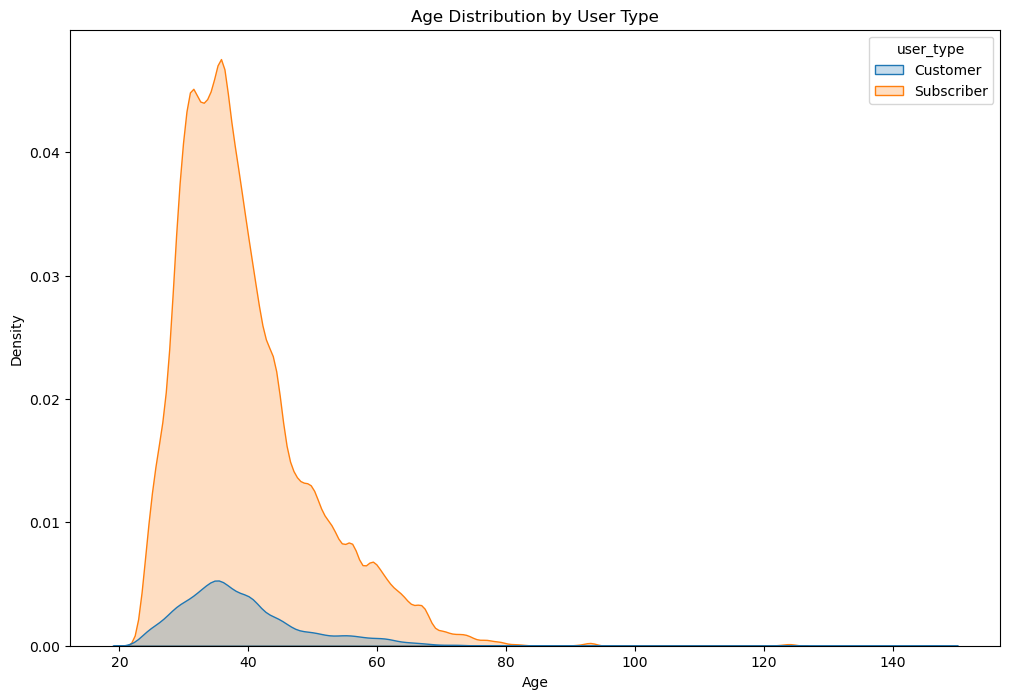

In [15]:
plt.figure(figsize=(12, 8))
# Create a Kernel Density Estimation plot with user type comparison
#use fil to see each user type
sns.kdeplot(data=df_analysis, x="member_age", hue="user_type", fill=True)
plt.title('Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Observation

>The majority of subscribers fall within the younger age range, particularly in their 30s
This suggests that younger users are more inclined to subscribe to the service rather than use it as one-time customers

## How does the distribution of subscribers and customers vary across different genders in the GoBike system?

>Examination of the users related to gender

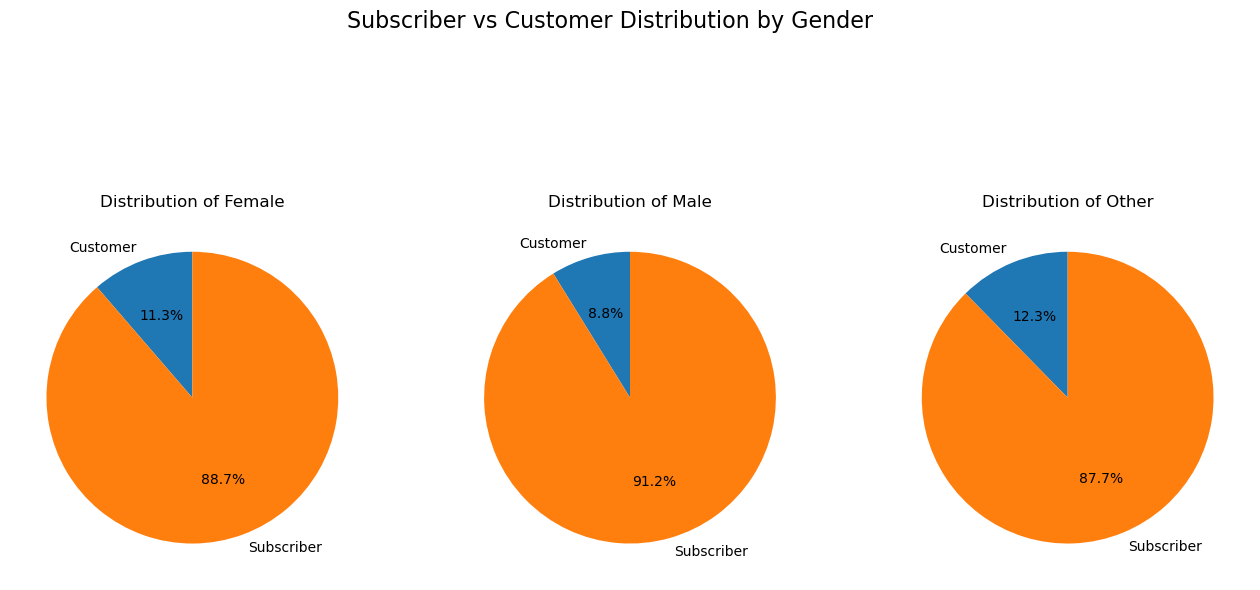

In [30]:
#  Create a crosstab to see the distribution of gender by user type
gender_user_distribution = pd.crosstab(df_analysis['member_gender'], df_analysis['user_type'])

#Create pie charts
plt.figure(figsize=(16, 8))

# Loop each gender to create a pie chart
for i, gender in enumerate(gender_user_distribution.index):
    plt.subplot(1, len(gender_user_distribution.index), i + 1)  # Create a subplot for each gender
    plt.pie(gender_user_distribution.loc[gender], labels=gender_user_distribution.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {gender}')

plt.suptitle('Subscriber vs Customer Distribution by Gender', fontsize=16)
plt.show()



## Observation 
>Across all gender categories (Female, Male, Other), the majority of users are Subscribers. This suggests that most users prefer the subscription model over being a one-time Customer, regardless of gender

##  How does the number of long trips vary throughout the day between users ?

> observe differences in usage patterns between subscribers and customers at different times of the day

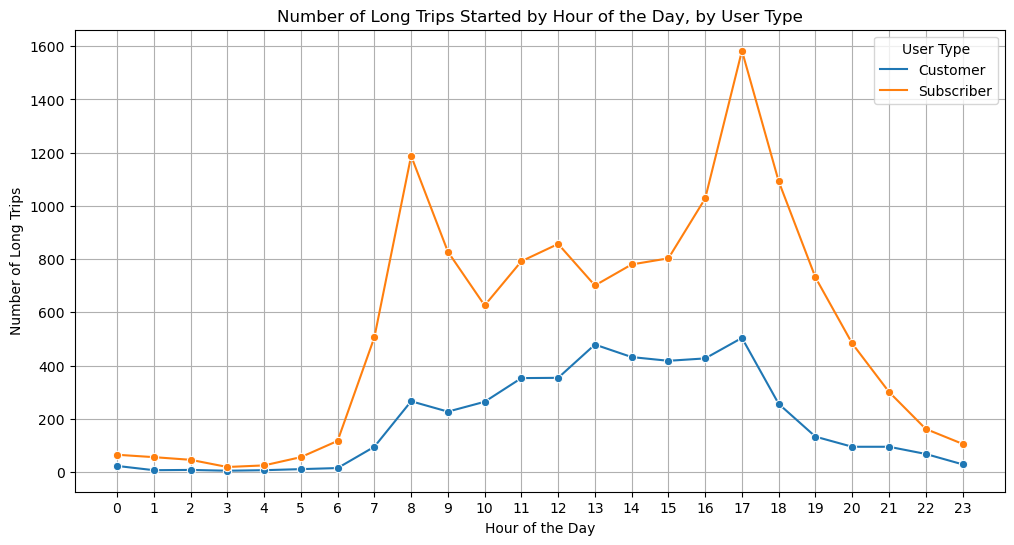

In [24]:
df_analysis['duration_min'] = df_analysis['duration_sec'] / 60
# Create a threshold to filter long trips top 10% by duration
threshold = df_analysis['duration_min'].quantile(0.90)
long_trips = df_analysis[df_analysis['duration_min'] >= threshold]

# Group by hour of the day and user type to count the number of long trips
hourly_long_trips_by_user_type = long_trips.groupby(['hour_of_day', 'user_type']).size().reset_index(name='num_long_trips')

# Create a line plot with separate lines for each user type
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='num_long_trips', hue='user_type', data=hourly_long_trips_by_user_type, marker='o')

plt.title('Number of Long Trips Started by Hour of the Day, by User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Long Trips')
plt.xticks(range(0, 24))  # Show every hour on the x-axis
plt.grid(True)
plt.legend(title='User Type')
plt.show()


## Observation

>Subscribers have a distinct peak in the number of long trips during the early morning hours (around 7-8 AM) and another peak in the late afternoon (around 5-6 PM). This pattern suggests that subscribers are likely using the service for commuting purposes, corresponding to typical work hours
